In [97]:
# Importing Libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import joblib
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Visualization Libraries
import plotly.express as px


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
#reading files content
df = pd.read_csv('Phishing_Email.csv')

In [99]:
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [100]:
#drop extra column

df.drop(columns='Unnamed: 0', inplace=True)
df.head(10)

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,global risk management operations sally congra...,Safe Email
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,re : coastal deal - with exxon participation u...,Safe Email


In [101]:
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (18650, 2)


In [102]:
# checking the duplicates

df.duplicated().sum()

1111

In [103]:
# removing the duplicates

df = df.drop_duplicates()
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (17539, 2)


In [104]:
df.isnull().sum()

Email Text    1
Email Type    0
dtype: int64

In [105]:
df.dropna(inplace=True,axis=0)
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (17538, 2)


In [106]:
#removing alphanumeric characters

df['Email Text'] = df['Email Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

df.head()

,Email Text,Email Type
0,re disc uniformitarianism re sex la...,Safe Email
1,the other side of galicismos galicismo is ...,Safe Email
2,re equistar deal tickets are you still availa...,Safe Email
3,\nHello I am your hot lil horny toy\n I am ...,Phishing Email
4,software at incredibly low prices lower d...,Phishing Email


In [107]:
#removing words like i, am, this, that etc...

stop = stopwords.words('english')
df["Email Text"] = df['Email Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,Hello I hot lil horny toy I one dream About I ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [108]:
#convert all data to lowercase

df['Email Text'] = df['Email Text'].str.lower()
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [109]:
#removing numbers

df['Email Text'] = df['Email Text'].str.replace(r'\d+', '', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [110]:
#removing white spaces

df['Email Text'] = df['Email Text'].str.replace(r'\s+', ' ', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [111]:
#removing special charcter

df['Email Text'] = df['Email Text'].str.replace(r'[^\w\s]', '', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


In [112]:
#removing urls if any

df['Email Text'] = df['Email Text'].str.replace(r'http\S+', '', regex=True)
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,Safe Email
1,side galicismos galicismo spanish term names i...,Safe Email
2,equistar deal tickets still available assist r...,Safe Email
3,hello i hot lil horny toy i one dream about i ...,Phishing Email
4,software incredibly low prices lower drapery s...,Phishing Email


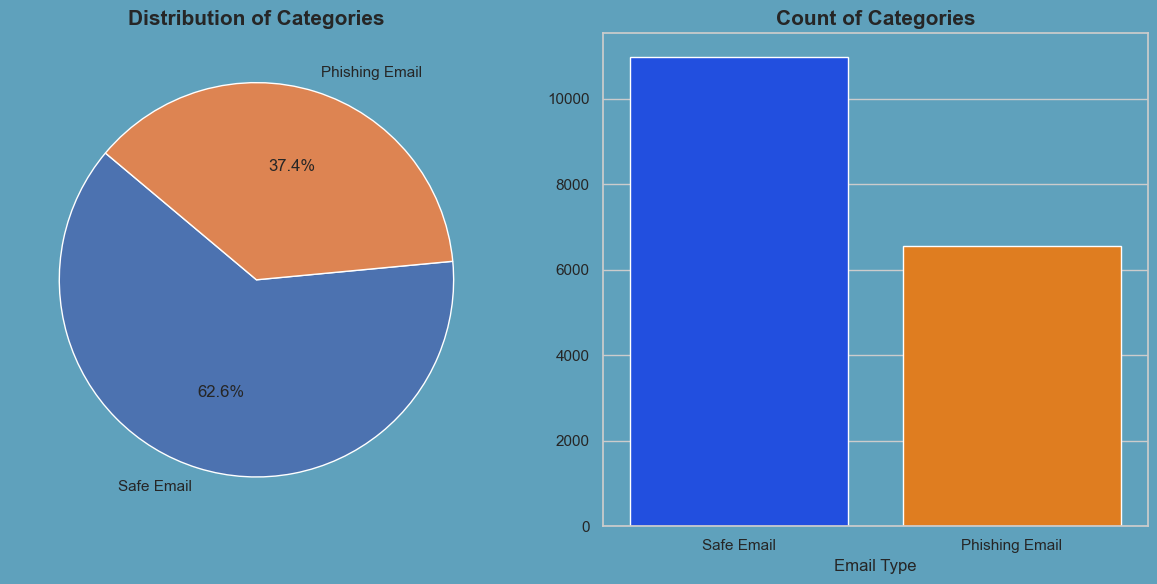

In [113]:
# Value count of 'label'
count = df['Email Type'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [114]:
#label encoding for the Email Type Column
le = LabelEncoder()
df["Email Type"] = le.fit_transform(df["Email Type"])

In [115]:
df.head()

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,1
1,side galicismos galicismo spanish term names i...,1
2,equistar deal tickets still available assist r...,1
3,hello i hot lil horny toy i one dream about i ...,0
4,software incredibly low prices lower drapery s...,0


In [116]:
#assign tokens for each unique word in dictionary
tf = TfidfVectorizer(stop_words="english",max_features=10000) #dimension reduction

feature_x = tf.fit_transform(df["Email Text"]).toarray()

In [117]:
y_tf = np.array(df['Email Type']) # convert the label into numpy array

In [118]:
#split the data into 20/80 for test/ train respectively
x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

# Print the shapes of the training and testing sets
print("The shape of X_train is ", x_train.shape)
print("The shape of X_test is ", x_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is  (14030, 10000)
The shape of X_test is  (3508, 10000)
The shape of y_train is (14030,)
The shape of y_test is (3508,)


In [119]:
# Logistic regression Model training
lg = LogisticRegression()
lg.fit(x_train, y_train)


LogisticRegression()

In [120]:
# Predictions
pred_lg = lg.predict(x_test)

In [121]:
# Performance metrics
accuracy = accuracy_score(y_test, pred_lg) * 100
f1 = f1_score(y_test, pred_lg) * 100

In [122]:
print("\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.2f} %")


Logistic Regression Performance Metrics:
Accuracy: 97.89 %


<Figure size 400x300 with 0 Axes>

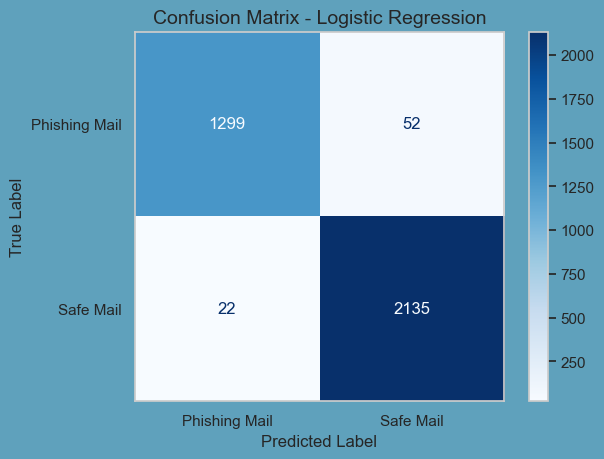

In [123]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_lg)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Phishing Mail', 'Safe Mail'])

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)  # Remove grid for cleaner look
plt.show()

In [124]:
# Save the trained model to a pickle file
with open("Email_Phishing_LG.pkl", "wb") as f:
    pickle.dump((tf, lg), f)

print("Model saved to Email_Phishing_LG.pkl")

Model saved to Email_Phishing_LG.pkl
